In [1]:
import tensorflow as tf
import cv2
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import relu, softmax
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
images = []
labels = []
path = "Dataset/indoorCVPR_09/Images/"
for i in os.listdir(path):
    file_loc = path + i
    
    for j in os.listdir(file_loc):
        try:
            img = cv2.imread(file_loc + "/" + j)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(i)
        except:
            print("Error in " + file_loc + "/" + j)
   



       


Error in Dataset/indoorCVPR_09/Images/bar/bar_0527.jpg
Error in Dataset/indoorCVPR_09/Images/buffet/Buffet_Lettuce_gif.jpg
Error in Dataset/indoorCVPR_09/Images/buffet/Buffet_Set_Up_2_gif.jpg
Error in Dataset/indoorCVPR_09/Images/buffet/Buffet_Set_Up_gif.jpg
Error in Dataset/indoorCVPR_09/Images/closet/closet_design_lg_gif.jpg
Error in Dataset/indoorCVPR_09/Images/closet/closet_gif.jpg
Error in Dataset/indoorCVPR_09/Images/computerroom/aula_informatica_gif.jpg
Error in Dataset/indoorCVPR_09/Images/computerroom/url_gif.jpg
Error in Dataset/indoorCVPR_09/Images/corridor/Corridor_gif.jpg
Error in Dataset/indoorCVPR_09/Images/corridor/down_corridor_frame_gif.jpg
Error in Dataset/indoorCVPR_09/Images/dentaloffice/Modern_Dental_Office_gif.jpg
Error in Dataset/indoorCVPR_09/Images/dining_room/stylise_gif.jpg
Error in Dataset/indoorCVPR_09/Images/fastfood_restaurant/connies_gif.jpg
Error in Dataset/indoorCVPR_09/Images/fastfood_restaurant/melvados_gif.jpg
Error in Dataset/indoorCVPR_09/Images/

In [3]:
images = np.array(images)
labels = np.array(labels)
ohe = OneHotEncoder()
labels = ohe.fit_transform(labels.reshape(-1,1)).toarray()
print(images.shape)
print(labels.shape)

(15590, 128, 128, 3)
(15590, 67)


In [4]:
from sklearn.model_selection import train_test_split

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2)


print("Train set shapes:")
print("Images:", images_train.shape)
print("Labels:", labels_train.shape)
print()
print("Test set shapes:")
print("Images:", images_test.shape)
print("Labels:", labels_test.shape)



Train set shapes:
Images: (12472, 128, 128, 3)
Labels: (12472, 67)

Test set shapes:
Images: (3118, 128, 128, 3)
Labels: (3118, 67)


In [5]:
def createModel(learning_rate,batch_size,epochs = 30):
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation='tanh', input_shape=(128,128,3)))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(32,(3,3),activation="tanh"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(64,(3,3),activation="tanh"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(128,(3,3),activation="tanh"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Flatten())


    model.add(Dense(3136, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(67, activation='softmax'))
   
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(images_train, labels_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    return hist,model

def plotResult(hist,lr,batch_size):

    fig = plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(hist.history['accuracy'],label = "Training Accuracy")
    plt.plot(hist.history['val_accuracy'],label = "Validation Accuracy")
    plt.title("Learning Rate = " + str(lr) + ", Batch Size = " + str(batch_size))
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(hist.history['loss'],label = "Training Loss")
    plt.plot(hist.history['val_loss'],label = "Validation Loss")
    plt.title("Learning Rate = " + str(lr) + ", Batch Size = " + str(batch_size))
    plt.legend()

    plt.show()

def plotConfusionMatrix(model,lr,batch_size):
    y_pred = model.predict(images_test)
    y_pred = np.argmax(y_pred,axis = 1)
    y_true = np.argmax(labels_test,axis = 1)
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(10,10))
    plt.imshow(cm,cmap = "Blues")
    plt.title("Learning Rate = " + str(lr) + ", Batch Size = " + str(batch_size))
    plt.colorbar()
    plt.show()


In [6]:
exp_batch = [16,32]
exp_lr = [0.001,0.0001,0.00005]

Epoch 1/30
624/624 [==============================] - 14s 20ms/step - loss: 3.8538 - accuracy: 0.0762 - val_loss: 3.6681 - val_accuracy: 0.0910
Epoch 2/30
624/624 [==============================] - 12s 19ms/step - loss: 3.6496 - accuracy: 0.0968 - val_loss: 3.5454 - val_accuracy: 0.1198
Epoch 3/30
624/624 [==============================] - 12s 19ms/step - loss: 3.5425 - accuracy: 0.1220 - val_loss: 3.4738 - val_accuracy: 0.1255
Epoch 4/30
624/624 [==============================] - 12s 19ms/step - loss: 3.4099 - accuracy: 0.1377 - val_loss: 3.4594 - val_accuracy: 0.1166
Epoch 5/30
624/624 [==============================] - 12s 19ms/step - loss: 3.2979 - accuracy: 0.1536 - val_loss: 3.4171 - val_accuracy: 0.1343
Epoch 6/30
624/624 [==============================] - 12s 19ms/step - loss: 3.1116 - accuracy: 0.1860 - val_loss: 3.3307 - val_accuracy: 0.1619
Epoch 7/30
624/624 [==============================] - 12s 19ms/step - loss: 2.9405 - accuracy: 0.2190 - val_loss: 3.4127 - val_accuracy:

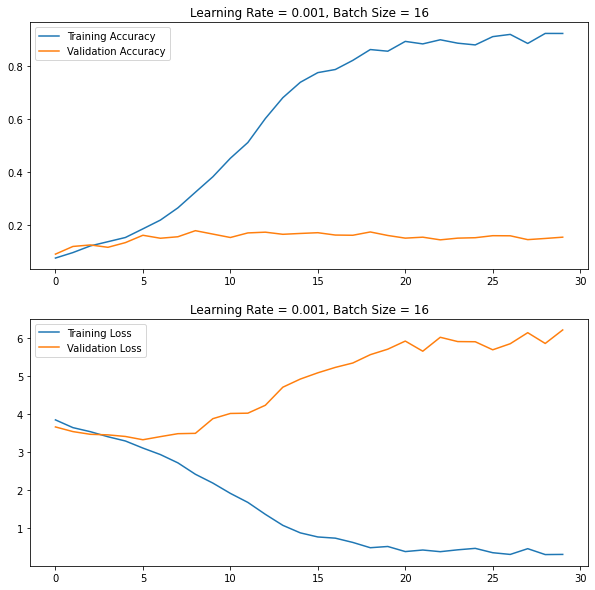

98/98 [==============================] - 1s 7ms/step


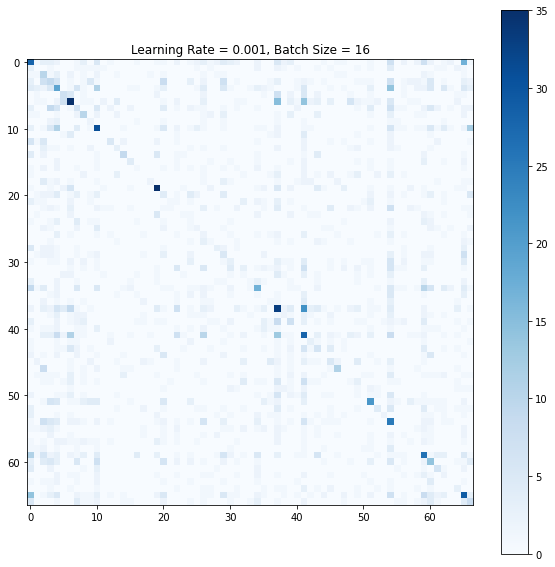

In [14]:
hist1,model1 = createModel(learning_rate=exp_lr[0],batch_size=exp_batch[0])
plotResult(hist1,exp_lr[0],exp_batch[0])
plotConfusionMatrix(model1,exp_lr[0],exp_batch[0])

Epoch 1/30
624/624 [==============================] - 14s 21ms/step - loss: 3.6556 - accuracy: 0.1110 - val_loss: 3.4846 - val_accuracy: 0.1279
Epoch 2/30
624/624 [==============================] - 13s 20ms/step - loss: 3.2523 - accuracy: 0.1723 - val_loss: 3.2778 - val_accuracy: 0.1784
Epoch 3/30
624/624 [==============================] - 12s 20ms/step - loss: 2.8267 - accuracy: 0.2616 - val_loss: 3.1720 - val_accuracy: 0.2128
Epoch 4/30
624/624 [==============================] - 12s 20ms/step - loss: 2.2200 - accuracy: 0.4047 - val_loss: 3.0862 - val_accuracy: 0.2377
Epoch 5/30
624/624 [==============================] - 13s 20ms/step - loss: 1.3504 - accuracy: 0.6284 - val_loss: 3.4205 - val_accuracy: 0.2184
Epoch 6/30
624/624 [==============================] - 12s 20ms/step - loss: 0.4883 - accuracy: 0.8834 - val_loss: 3.9879 - val_accuracy: 0.2152
Epoch 7/30
624/624 [==============================] - 12s 20ms/step - loss: 0.1202 - accuracy: 0.9805 - val_loss: 4.3360 - val_accuracy:

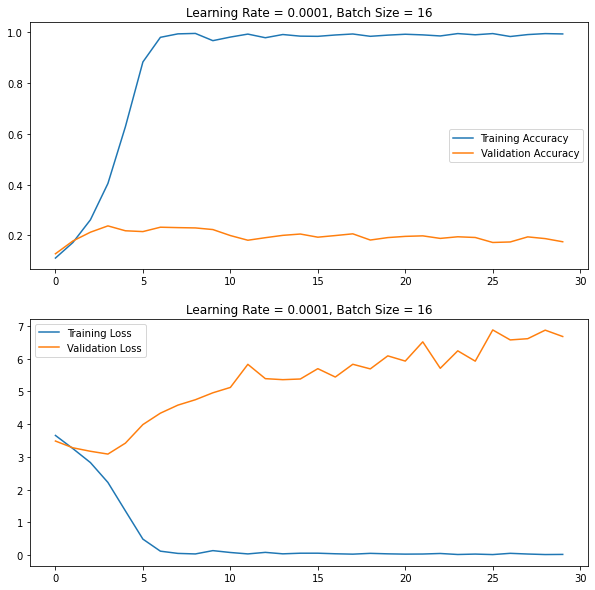

98/98 [==============================] - 1s 6ms/step


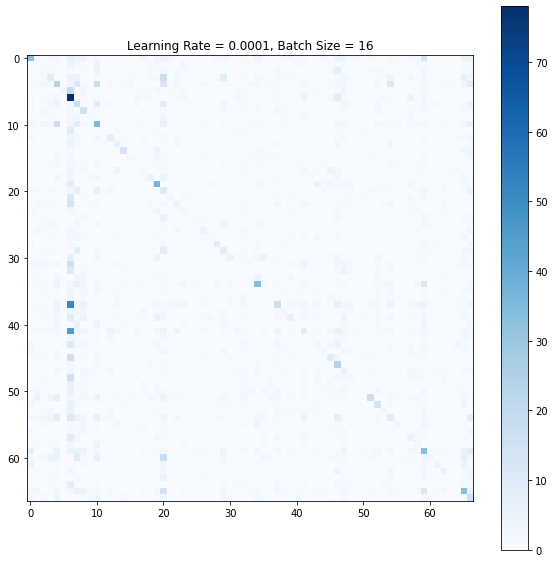

In [15]:
hist2,model2 = createModel(learning_rate=exp_lr[1],batch_size=exp_batch[0])
plotResult(hist2,exp_lr[1],exp_batch[0])
plotConfusionMatrix(model2,exp_lr[1],exp_batch[0])

Epoch 1/30
624/624 [==============================] - 12s 18ms/step - loss: 3.7179 - accuracy: 0.0997 - val_loss: 3.5252 - val_accuracy: 0.1246
Epoch 2/30
624/624 [==============================] - 11s 17ms/step - loss: 3.3832 - accuracy: 0.1531 - val_loss: 3.3879 - val_accuracy: 0.1595
Epoch 3/30
624/624 [==============================] - 11s 18ms/step - loss: 3.1137 - accuracy: 0.2075 - val_loss: 3.2828 - val_accuracy: 0.1760
Epoch 4/30
624/624 [==============================] - 11s 17ms/step - loss: 2.8013 - accuracy: 0.2675 - val_loss: 3.2043 - val_accuracy: 0.2032
Epoch 5/30
624/624 [==============================] - 11s 17ms/step - loss: 2.4068 - accuracy: 0.3631 - val_loss: 3.2261 - val_accuracy: 0.2092
Epoch 6/30
624/624 [==============================] - 11s 17ms/step - loss: 1.9536 - accuracy: 0.4716 - val_loss: 3.2437 - val_accuracy: 0.2144
Epoch 7/30
624/624 [==============================] - 11s 18ms/step - loss: 1.4584 - accuracy: 0.6150 - val_loss: 3.3571 - val_accuracy:

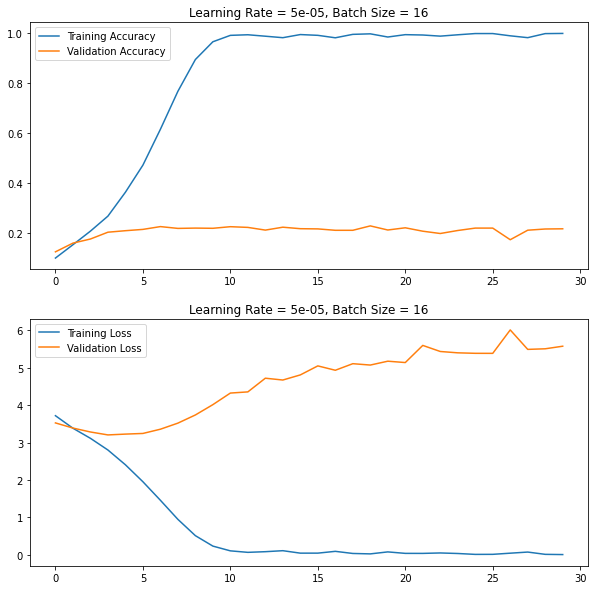

98/98 [==============================] - 1s 5ms/step


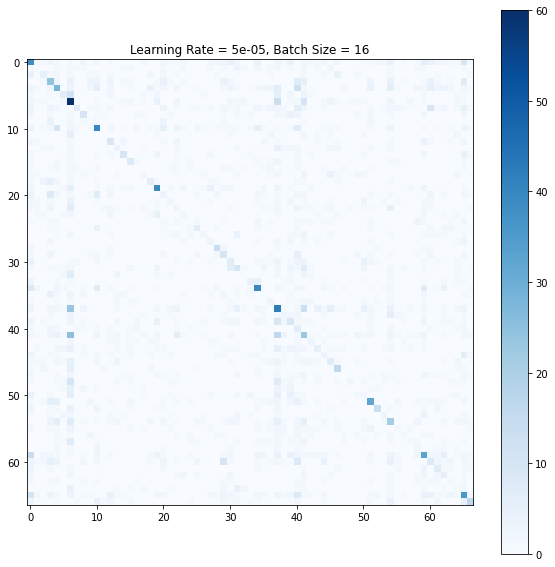

In [16]:
hist3,model3 = createModel(learning_rate=exp_lr[2],batch_size=exp_batch[0])
plotResult(hist3,exp_lr[2],exp_batch[0])
plotConfusionMatrix(model3,exp_lr[2],exp_batch[0])

Epoch 1/30
312/312 [==============================] - 8s 23ms/step - loss: 3.8161 - accuracy: 0.0821 - val_loss: 3.8330 - val_accuracy: 0.0782
Epoch 2/30
312/312 [==============================] - 7s 21ms/step - loss: 3.5980 - accuracy: 0.1078 - val_loss: 3.5744 - val_accuracy: 0.1094
Epoch 3/30
312/312 [==============================] - 7s 21ms/step - loss: 3.4586 - accuracy: 0.1289 - val_loss: 3.4395 - val_accuracy: 0.1206
Epoch 4/30
312/312 [==============================] - 6s 19ms/step - loss: 3.2597 - accuracy: 0.1658 - val_loss: 3.3430 - val_accuracy: 0.1635
Epoch 5/30
312/312 [==============================] - 5s 16ms/step - loss: 3.0394 - accuracy: 0.2030 - val_loss: 3.4448 - val_accuracy: 0.1667
Epoch 6/30
312/312 [==============================] - 5s 16ms/step - loss: 2.7768 - accuracy: 0.2528 - val_loss: 3.2996 - val_accuracy: 0.1920
Epoch 7/30
312/312 [==============================] - 5s 16ms/step - loss: 2.3921 - accuracy: 0.3437 - val_loss: 3.4016 - val_accuracy: 0.1856

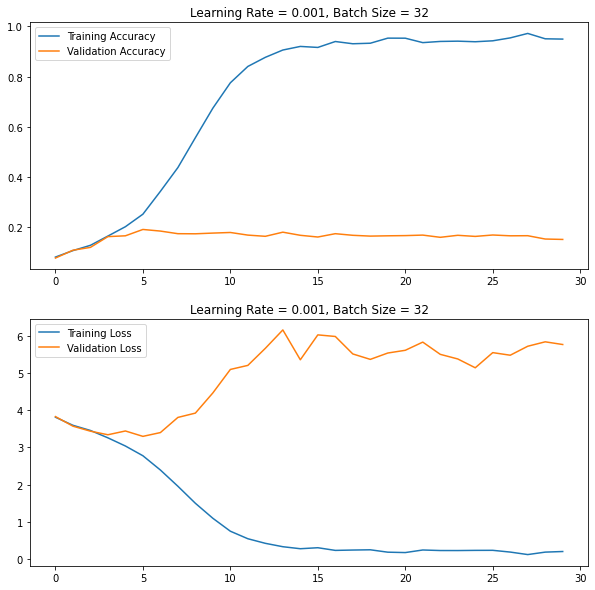

98/98 [==============================] - 1s 5ms/step


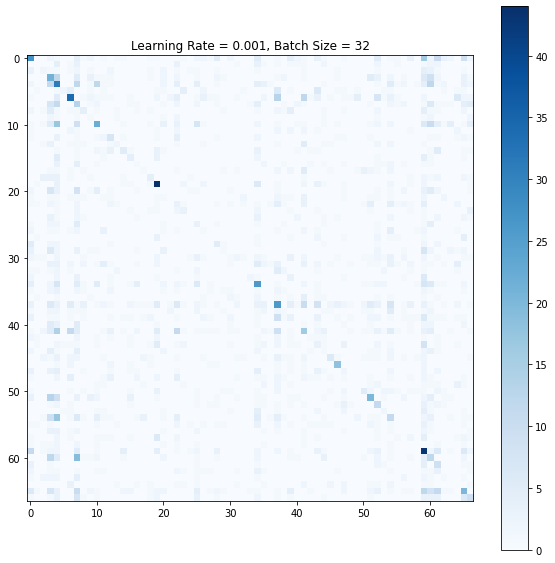

In [17]:
hist4,model4 = createModel(learning_rate=exp_lr[0],batch_size=exp_batch[1])
plotResult(hist4,exp_lr[0],exp_batch[1])
plotConfusionMatrix(model4,exp_lr[0],exp_batch[1])

Epoch 1/30
312/312 [==============================] - 7s 21ms/step - loss: 3.6674 - accuracy: 0.1071 - val_loss: 3.4997 - val_accuracy: 0.1259
Epoch 2/30
312/312 [==============================] - 6s 21ms/step - loss: 3.2791 - accuracy: 0.1669 - val_loss: 3.3574 - val_accuracy: 0.1503
Epoch 3/30
312/312 [==============================] - 7s 21ms/step - loss: 2.9315 - accuracy: 0.2373 - val_loss: 3.1689 - val_accuracy: 0.1940
Epoch 4/30
312/312 [==============================] - 7s 21ms/step - loss: 2.5106 - accuracy: 0.3266 - val_loss: 3.1447 - val_accuracy: 0.2240
Epoch 5/30
312/312 [==============================] - 6s 21ms/step - loss: 1.9295 - accuracy: 0.4740 - val_loss: 3.1467 - val_accuracy: 0.2281
Epoch 6/30
312/312 [==============================] - 7s 21ms/step - loss: 1.2341 - accuracy: 0.6699 - val_loss: 3.3441 - val_accuracy: 0.2321
Epoch 7/30
312/312 [==============================] - 7s 21ms/step - loss: 0.5659 - accuracy: 0.8720 - val_loss: 3.6255 - val_accuracy: 0.2333

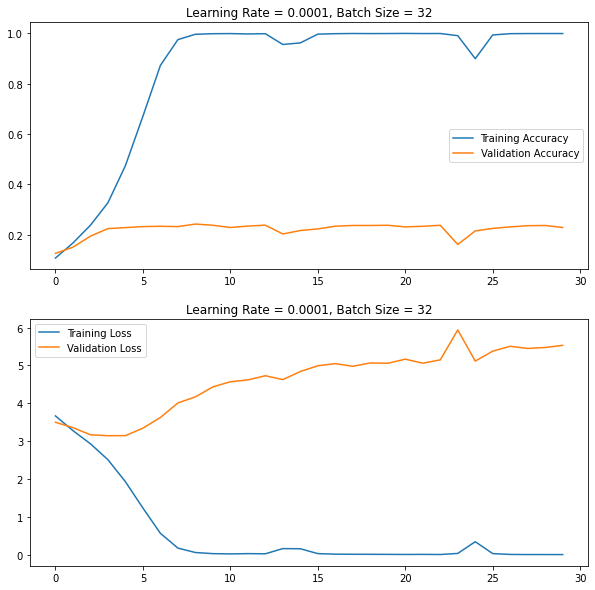

98/98 [==============================] - 1s 5ms/step


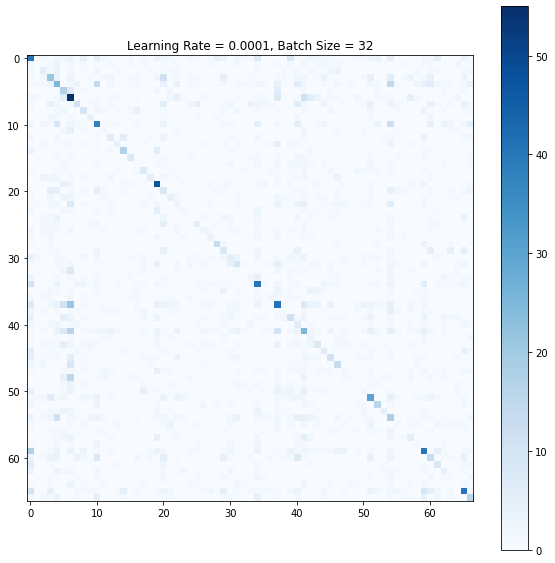

In [18]:
hist5,model5 = createModel(learning_rate=exp_lr[1],batch_size=exp_batch[1])
plotResult(hist5,exp_lr[1],exp_batch[1])
plotConfusionMatrix(model5,exp_lr[1],exp_batch[1])

Epoch 1/30
312/312 [==============================] - 7s 21ms/step - loss: 3.7679 - accuracy: 0.0906 - val_loss: 3.5820 - val_accuracy: 0.1122
Epoch 2/30
312/312 [==============================] - 7s 21ms/step - loss: 3.4255 - accuracy: 0.1427 - val_loss: 3.4324 - val_accuracy: 0.1319
Epoch 3/30
312/312 [==============================] - 6s 21ms/step - loss: 3.1931 - accuracy: 0.1884 - val_loss: 3.3018 - val_accuracy: 0.1784
Epoch 4/30
312/312 [==============================] - 7s 21ms/step - loss: 2.9458 - accuracy: 0.2350 - val_loss: 3.2502 - val_accuracy: 0.1776
Epoch 5/30
312/312 [==============================] - 7s 21ms/step - loss: 2.6738 - accuracy: 0.2942 - val_loss: 3.2093 - val_accuracy: 0.1944
Epoch 6/30
312/312 [==============================] - 7s 21ms/step - loss: 2.3786 - accuracy: 0.3672 - val_loss: 3.2288 - val_accuracy: 0.1816
Epoch 7/30
312/312 [==============================] - 6s 21ms/step - loss: 2.0293 - accuracy: 0.4578 - val_loss: 3.1932 - val_accuracy: 0.2008

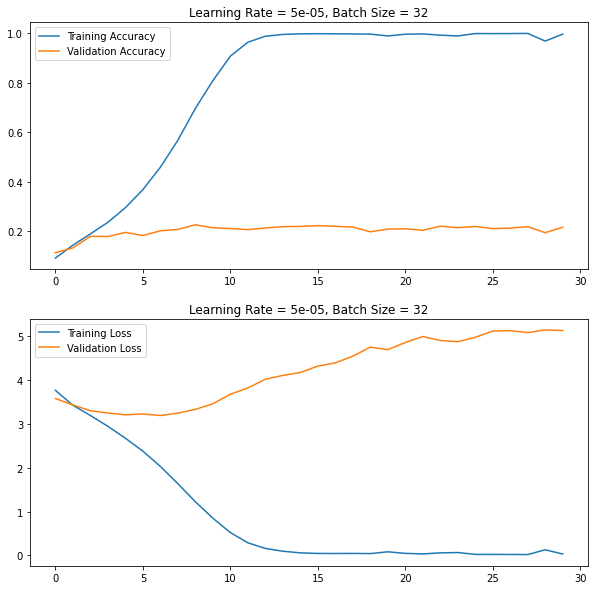

98/98 [==============================] - 1s 5ms/step


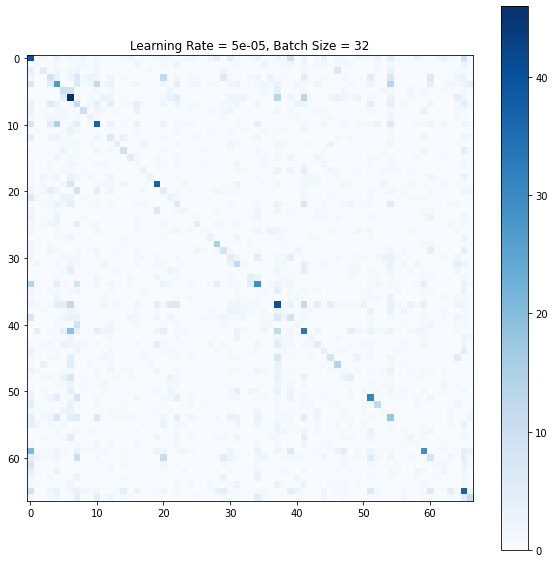

In [19]:
hist6,model6 = createModel(learning_rate=exp_lr[2],batch_size=exp_batch[1])
plotResult(hist6,exp_lr[2],exp_batch[1])
plotConfusionMatrix(model6,exp_lr[2],exp_batch[1])

Best Setting --> Learning Rate = 0.001 , Batch Size = 16

## Dropout Experiments

In [7]:
def createModel_Dropout(learning_rate,batch_size,epochs = 30,dropout_rate = 0.2):
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation='tanh', input_shape=(128,128,3)))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(32,(3,3),activation="tanh"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(64,(3,3),activation="tanh"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(128,(3,3),activation="tanh"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Flatten())


    model.add(Dense(3136, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(67, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(images_train, labels_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    return hist,model




In [8]:
dropout_values = [0.2,0.3,0.4,0.5]
lr = 0.001
batch_size = 16
labels_test = np.argmax(labels_test,axis=1).reshape(-1,1)


Epoch 1/30
624/624 [==============================] - 16s 17ms/step - loss: 3.9170 - accuracy: 0.0722 - val_loss: 3.7532 - val_accuracy: 0.0717
Epoch 2/30
624/624 [==============================] - 10s 15ms/step - loss: 3.7127 - accuracy: 0.0854 - val_loss: 3.5970 - val_accuracy: 0.1102
Epoch 3/30
624/624 [==============================] - 10s 15ms/step - loss: 3.6680 - accuracy: 0.0925 - val_loss: 3.5587 - val_accuracy: 0.1110
Epoch 4/30
624/624 [==============================] - 10s 15ms/step - loss: 3.5459 - accuracy: 0.1122 - val_loss: 3.6486 - val_accuracy: 0.0958
Epoch 5/30
624/624 [==============================] - 10s 16ms/step - loss: 3.4774 - accuracy: 0.1201 - val_loss: 3.5264 - val_accuracy: 0.1218
Epoch 6/30
624/624 [==============================] - 10s 16ms/step - loss: 3.3930 - accuracy: 0.1371 - val_loss: 3.4340 - val_accuracy: 0.1515
Epoch 7/30
624/624 [==============================] - 10s 16ms/step - loss: 3.2787 - accuracy: 0.1596 - val_loss: 3.3523 - val_accuracy:

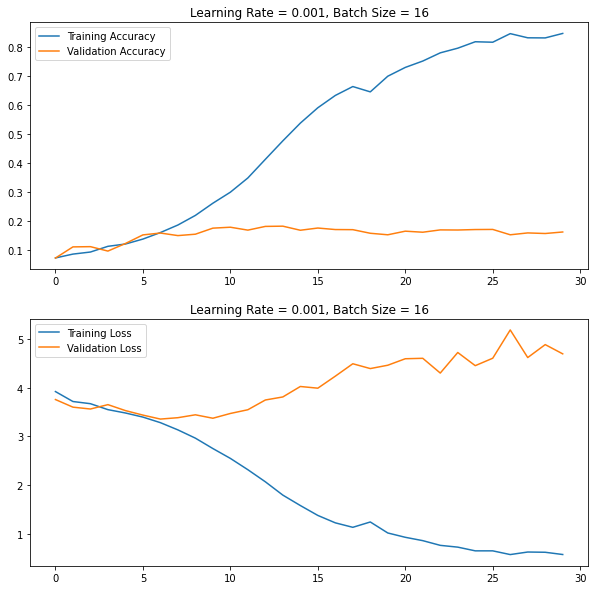

98/98 [==============================] - 1s 6ms/step


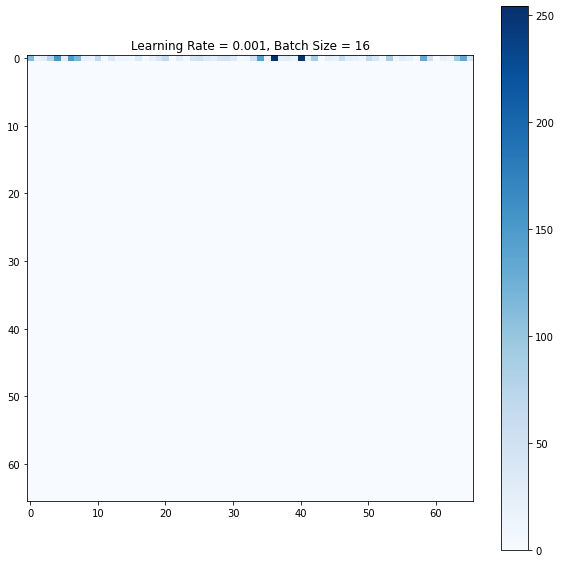

In [9]:
hist1,model1 = createModel_Dropout(learning_rate=lr,batch_size=batch_size,epochs=30,dropout_rate=dropout_values[0])
plotResult(hist1,lr,batch_size)
plotConfusionMatrix(model1,lr,batch_size)

Epoch 1/30
624/624 [==============================] - 11s 16ms/step - loss: 3.9785 - accuracy: 0.0625 - val_loss: 3.7874 - val_accuracy: 0.0745
Epoch 2/30
624/624 [==============================] - 10s 16ms/step - loss: 3.7686 - accuracy: 0.0865 - val_loss: 3.6292 - val_accuracy: 0.0998
Epoch 3/30
624/624 [==============================] - 10s 16ms/step - loss: 3.6849 - accuracy: 0.0960 - val_loss: 3.7116 - val_accuracy: 0.0986
Epoch 4/30
624/624 [==============================] - 10s 16ms/step - loss: 3.6024 - accuracy: 0.1072 - val_loss: 3.7183 - val_accuracy: 0.0906
Epoch 5/30
624/624 [==============================] - 10s 16ms/step - loss: 3.5546 - accuracy: 0.1172 - val_loss: 3.5235 - val_accuracy: 0.1234
Epoch 6/30
624/624 [==============================] - 10s 16ms/step - loss: 3.4689 - accuracy: 0.1256 - val_loss: 3.5492 - val_accuracy: 0.1210
Epoch 7/30
624/624 [==============================] - 10s 16ms/step - loss: 3.4035 - accuracy: 0.1367 - val_loss: 3.4806 - val_accuracy:

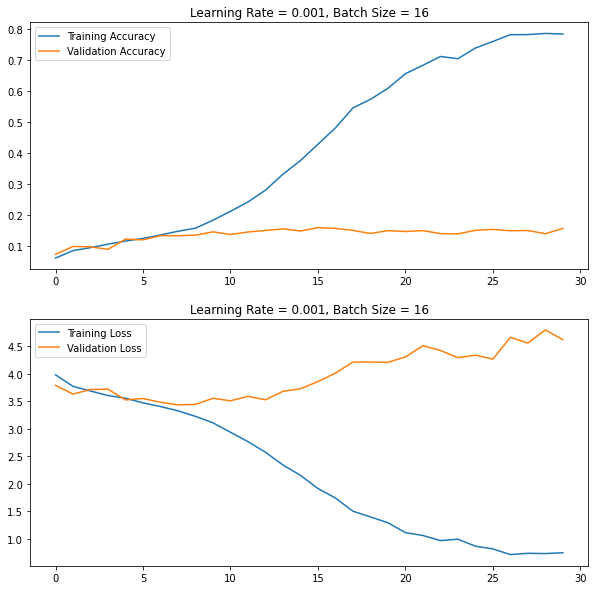

98/98 [==============================] - 1s 5ms/step


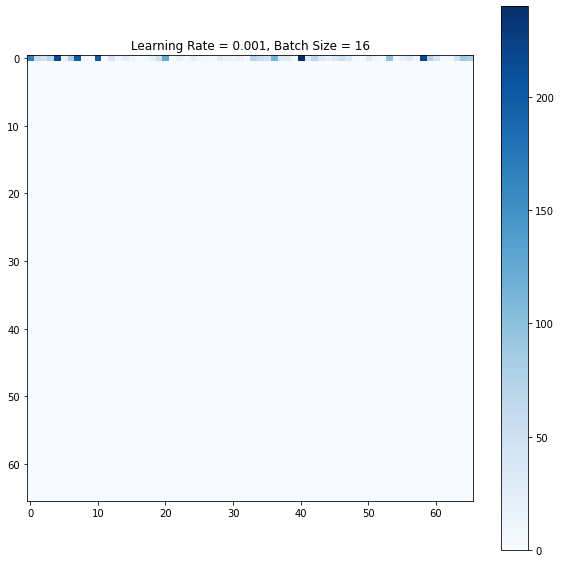

In [10]:
hist2,model2 = createModel_Dropout(learning_rate=lr,batch_size=batch_size,epochs=30,dropout_rate=dropout_values[1])
plotResult(hist2,lr,batch_size)
plotConfusionMatrix(model2,lr,batch_size)

Epoch 1/30
624/624 [==============================] - 11s 16ms/step - loss: 3.9572 - accuracy: 0.0608 - val_loss: 3.8260 - val_accuracy: 0.0681
Epoch 2/30
624/624 [==============================] - 10s 16ms/step - loss: 3.8006 - accuracy: 0.0801 - val_loss: 3.6912 - val_accuracy: 0.0974
Epoch 3/30
624/624 [==============================] - 10s 16ms/step - loss: 3.7367 - accuracy: 0.0857 - val_loss: 3.7202 - val_accuracy: 0.0874
Epoch 4/30
624/624 [==============================] - 10s 16ms/step - loss: 3.6939 - accuracy: 0.0944 - val_loss: 3.6469 - val_accuracy: 0.0990
Epoch 5/30
624/624 [==============================] - 10s 16ms/step - loss: 3.7391 - accuracy: 0.0874 - val_loss: 3.6467 - val_accuracy: 0.1006
Epoch 6/30
624/624 [==============================] - 10s 16ms/step - loss: 3.5827 - accuracy: 0.1079 - val_loss: 3.5833 - val_accuracy: 0.1094
Epoch 7/30
624/624 [==============================] - 10s 16ms/step - loss: 3.5385 - accuracy: 0.1175 - val_loss: 3.5522 - val_accuracy:

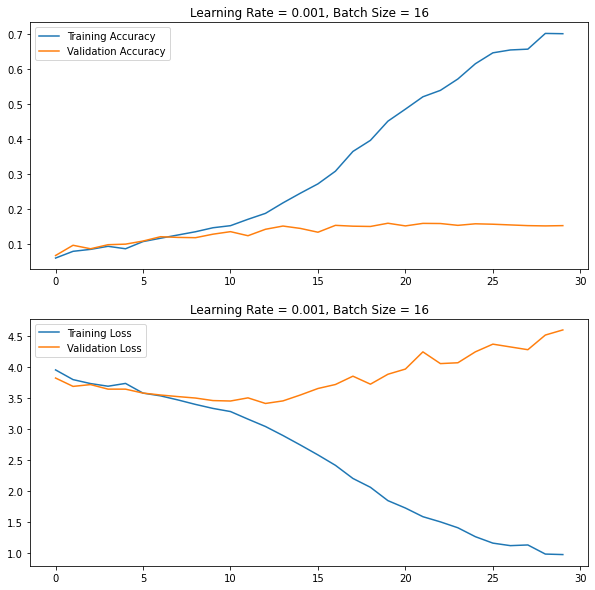

98/98 [==============================] - 1s 5ms/step


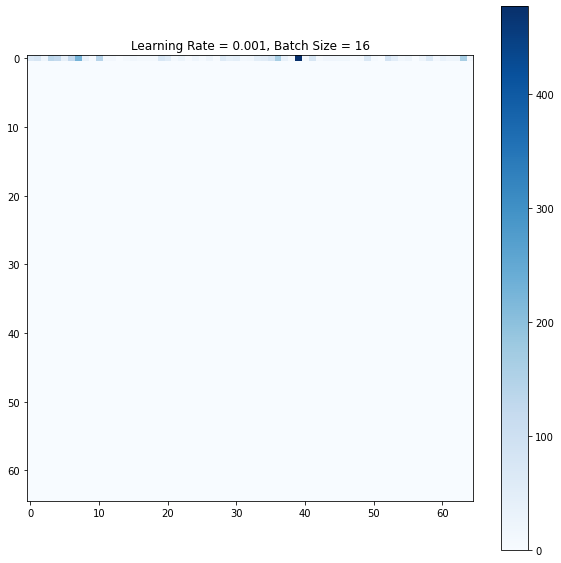

In [11]:
hist3,model3 = createModel_Dropout(learning_rate=lr,batch_size=batch_size,epochs=30,dropout_rate=dropout_values[2])
plotResult(hist3,lr,batch_size)
plotConfusionMatrix(model3,lr,batch_size)

Epoch 1/30
624/624 [==============================] - 11s 16ms/step - loss: 3.9520 - accuracy: 0.0689 - val_loss: 3.9939 - val_accuracy: 0.0737
Epoch 2/30
624/624 [==============================] - 10s 16ms/step - loss: 3.8195 - accuracy: 0.0782 - val_loss: 3.7145 - val_accuracy: 0.0814
Epoch 3/30
624/624 [==============================] - 10s 16ms/step - loss: 3.7557 - accuracy: 0.0865 - val_loss: 3.7234 - val_accuracy: 0.0958
Epoch 4/30
624/624 [==============================] - 10s 15ms/step - loss: 3.6804 - accuracy: 0.1008 - val_loss: 3.6242 - val_accuracy: 0.0998
Epoch 5/30
624/624 [==============================] - 10s 15ms/step - loss: 3.6254 - accuracy: 0.1046 - val_loss: 3.5070 - val_accuracy: 0.1291
Epoch 6/30
624/624 [==============================] - 10s 15ms/step - loss: 3.5676 - accuracy: 0.1076 - val_loss: 3.7579 - val_accuracy: 0.0902
Epoch 7/30
624/624 [==============================] - 10s 15ms/step - loss: 3.5723 - accuracy: 0.1146 - val_loss: 3.4623 - val_accuracy:

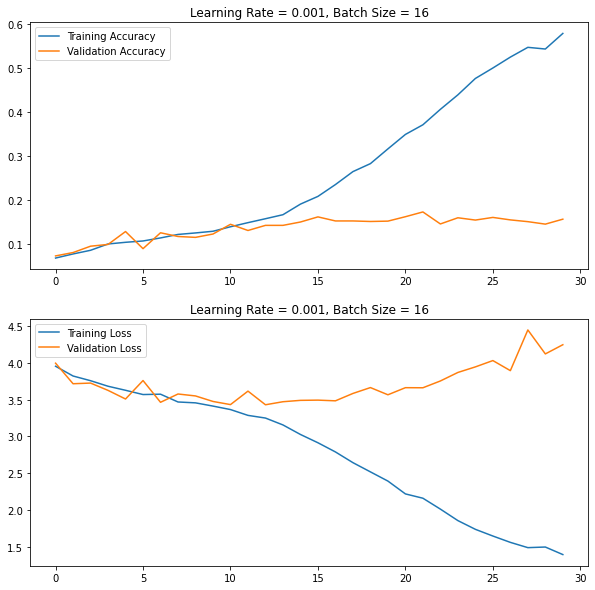

98/98 [==============================] - 1s 5ms/step


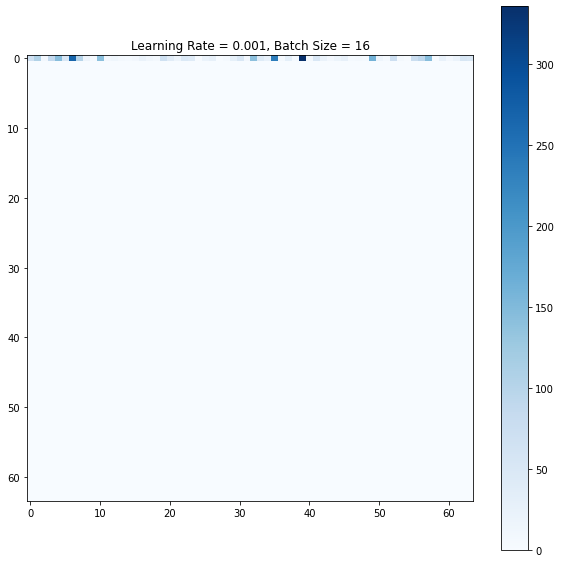

In [12]:
hist4,model4 = createModel_Dropout(learning_rate=lr,batch_size=batch_size,epochs=30,dropout_rate=dropout_values[3])
plotResult(hist4,lr,batch_size)
plotConfusionMatrix(model4,lr,batch_size)

## PART 2 

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

vgg16_model = VGG16(weights='imagenet', include_top=False,classes = 67, input_shape=(128,128,3))
print(vgg16_model.summary())

# Freeze all the layers 
for layer in vgg16_model.layers:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg16_model.layers:
    print(layer, layer.trainable)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [8]:
def createVGGModel(lr,batch_size):
    model = Sequential()
    model.add(vgg16_model)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(67, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(images_train, labels_train, batch_size=batch_size, epochs=20, validation_split=0.2)
    return hist,model
    

In [11]:
lr = [0.001,0.0001,0.00001]
batch_size = [16,32]

Epoch 1/20
624/624 [==============================] - 31s 45ms/step - loss: 5.2245 - accuracy: 0.2485 - val_loss: 2.8637 - val_accuracy: 0.3094
Epoch 2/20
624/624 [==============================] - 25s 40ms/step - loss: 2.1991 - accuracy: 0.4474 - val_loss: 2.6977 - val_accuracy: 0.3752
Epoch 3/20
624/624 [==============================] - 25s 40ms/step - loss: 1.5594 - accuracy: 0.5759 - val_loss: 2.7408 - val_accuracy: 0.3968
Epoch 4/20
624/624 [==============================] - 25s 40ms/step - loss: 1.1725 - accuracy: 0.6787 - val_loss: 2.9388 - val_accuracy: 0.4144
Epoch 5/20
624/624 [==============================] - 25s 40ms/step - loss: 1.0363 - accuracy: 0.7244 - val_loss: 3.4885 - val_accuracy: 0.3976
Epoch 6/20
624/624 [==============================] - 25s 40ms/step - loss: 0.9070 - accuracy: 0.7687 - val_loss: 3.3974 - val_accuracy: 0.4196
Epoch 7/20
624/624 [==============================] - 25s 40ms/step - loss: 0.8334 - accuracy: 0.7952 - val_loss: 4.2644 - val_accuracy:

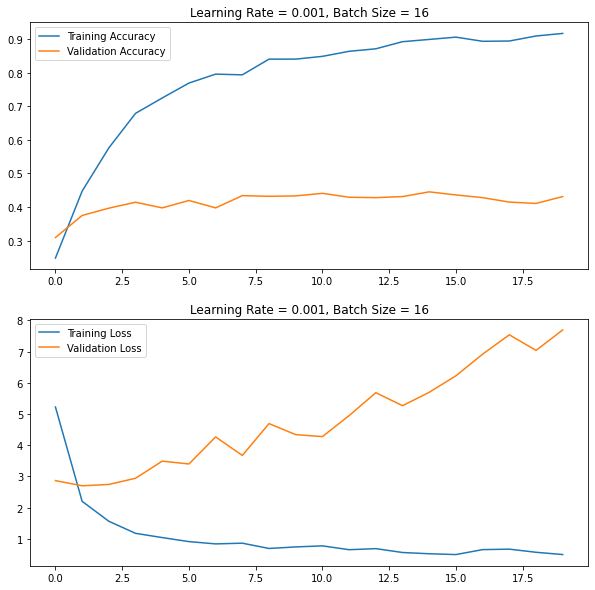

98/98 [==============================] - 9s 64ms/step


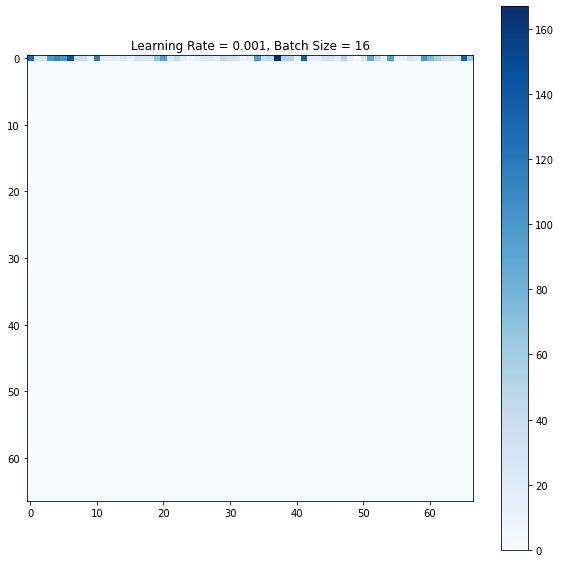

In [16]:
hist1,vgg1 = createVGGModel(lr[0],batch_size[0])
plotResult(hist1,lr[0],batch_size[0])
plotConfusionMatrix(vgg1,lr[0],batch_size[0])

Epoch 1/20
624/624 [==============================] - 26s 41ms/step - loss: 5.1376 - accuracy: 0.2235 - val_loss: 3.1485 - val_accuracy: 0.2866
Epoch 2/20
624/624 [==============================] - 25s 40ms/step - loss: 1.4033 - accuracy: 0.6356 - val_loss: 3.3566 - val_accuracy: 0.3347
Epoch 3/20
624/624 [==============================] - 25s 40ms/step - loss: 0.3804 - accuracy: 0.8960 - val_loss: 3.5335 - val_accuracy: 0.4012
Epoch 4/20
624/624 [==============================] - 25s 40ms/step - loss: 0.1302 - accuracy: 0.9696 - val_loss: 3.9015 - val_accuracy: 0.3944
Epoch 5/20
624/624 [==============================] - 25s 40ms/step - loss: 0.2249 - accuracy: 0.9455 - val_loss: 4.4945 - val_accuracy: 0.3924
Epoch 6/20
624/624 [==============================] - 25s 40ms/step - loss: 0.2541 - accuracy: 0.9325 - val_loss: 4.2382 - val_accuracy: 0.4008
Epoch 7/20
624/624 [==============================] - 25s 40ms/step - loss: 0.2626 - accuracy: 0.9357 - val_loss: 4.5776 - val_accuracy:

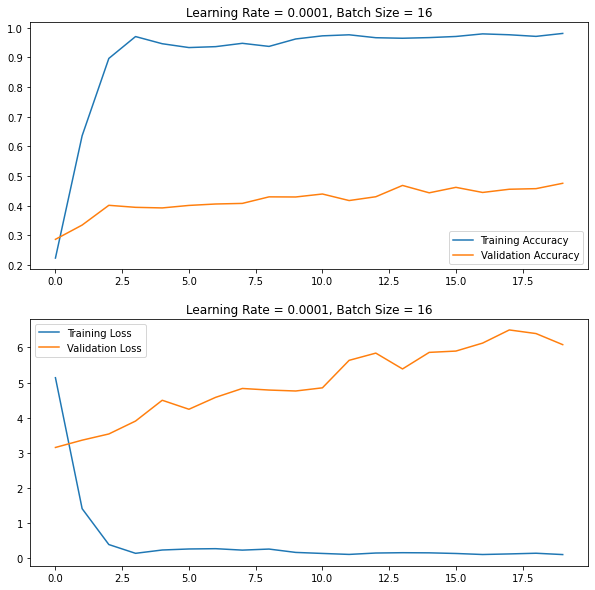

98/98 [==============================] - 5s 48ms/step


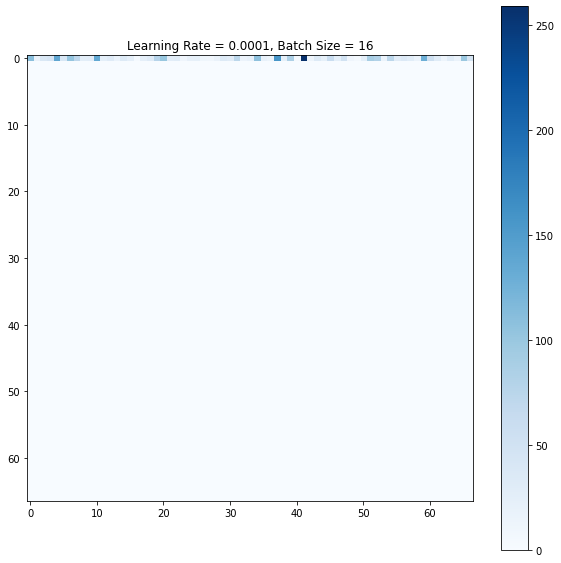

In [17]:
hist2,vgg2 = createVGGModel(lr[1],batch_size[0])
plotResult(hist2,lr[1],batch_size[0])
plotConfusionMatrix(vgg2,lr[1],batch_size[0])

Epoch 1/20
624/624 [==============================] - 35s 46ms/step - loss: 12.9772 - accuracy: 0.1155 - val_loss: 7.7601 - val_accuracy: 0.1824
Epoch 2/20
624/624 [==============================] - 24s 38ms/step - loss: 4.3051 - accuracy: 0.3664 - val_loss: 6.1317 - val_accuracy: 0.2345
Epoch 3/20
624/624 [==============================] - 24s 39ms/step - loss: 1.8033 - accuracy: 0.6516 - val_loss: 5.8689 - val_accuracy: 0.2473
Epoch 4/20
624/624 [==============================] - 24s 39ms/step - loss: 0.6922 - accuracy: 0.8538 - val_loss: 5.6982 - val_accuracy: 0.2653
Epoch 5/20
624/624 [==============================] - 20s 32ms/step - loss: 0.2367 - accuracy: 0.9570 - val_loss: 5.7127 - val_accuracy: 0.2709
Epoch 6/20
624/624 [==============================] - 24s 38ms/step - loss: 0.0882 - accuracy: 0.9891 - val_loss: 5.7212 - val_accuracy: 0.2826
Epoch 7/20
624/624 [==============================] - 26s 42ms/step - loss: 0.0475 - accuracy: 0.9967 - val_loss: 5.7285 - val_accuracy

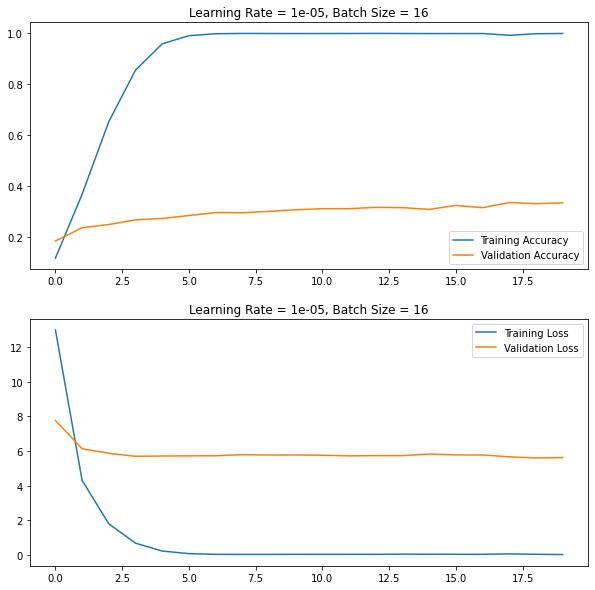

98/98 [==============================] - 11s 77ms/step


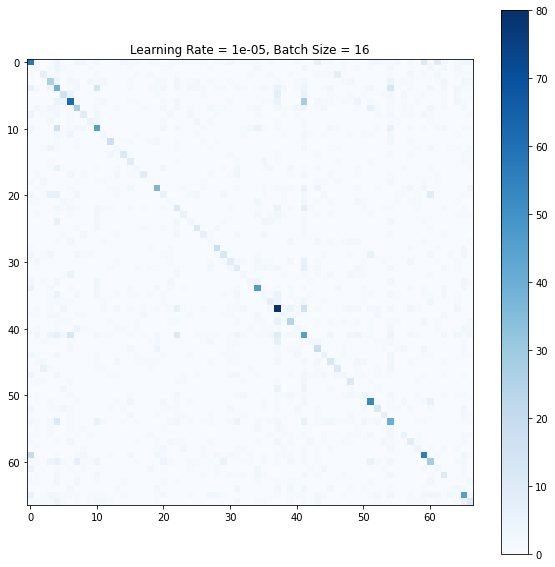

In [11]:
hist3,vgg3 = createVGGModel(lr[2],batch_size[0])
plotResult(hist3,lr[2],batch_size[0])
plotConfusionMatrix(vgg3,lr[2],batch_size[0])

Epoch 1/20
312/312 [==============================] - 29s 90ms/step - loss: 5.7283 - accuracy: 0.2138 - val_loss: 2.7580 - val_accuracy: 0.3375
Epoch 2/20
312/312 [==============================] - 22s 70ms/step - loss: 2.1892 - accuracy: 0.4484 - val_loss: 2.5561 - val_accuracy: 0.3972
Epoch 3/20
312/312 [==============================] - 24s 77ms/step - loss: 1.3648 - accuracy: 0.6277 - val_loss: 2.5719 - val_accuracy: 0.4036
Epoch 4/20
312/312 [==============================] - 22s 69ms/step - loss: 0.8297 - accuracy: 0.7616 - val_loss: 2.7759 - val_accuracy: 0.4261
Epoch 5/20
312/312 [==============================] - 24s 77ms/step - loss: 0.5606 - accuracy: 0.8368 - val_loss: 3.1045 - val_accuracy: 0.4469
Epoch 6/20
312/312 [==============================] - 24s 77ms/step - loss: 0.5367 - accuracy: 0.8563 - val_loss: 3.6247 - val_accuracy: 0.4253
Epoch 7/20
312/312 [==============================] - 24s 77ms/step - loss: 0.5997 - accuracy: 0.8520 - val_loss: 3.8795 - val_accuracy:

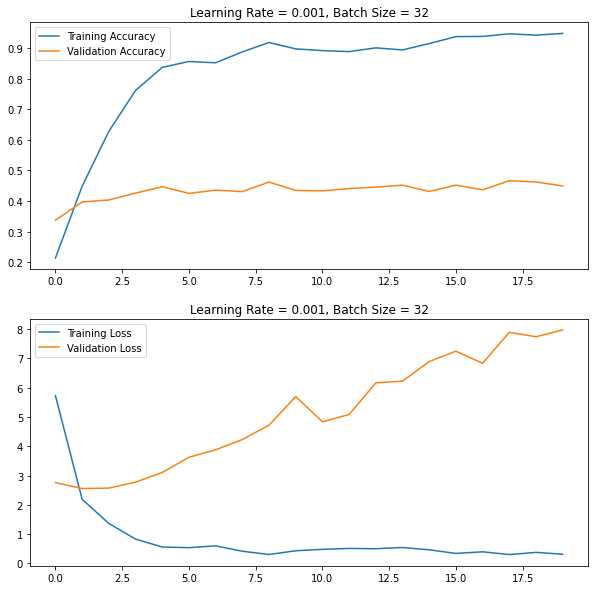

98/98 [==============================] - 5s 48ms/step


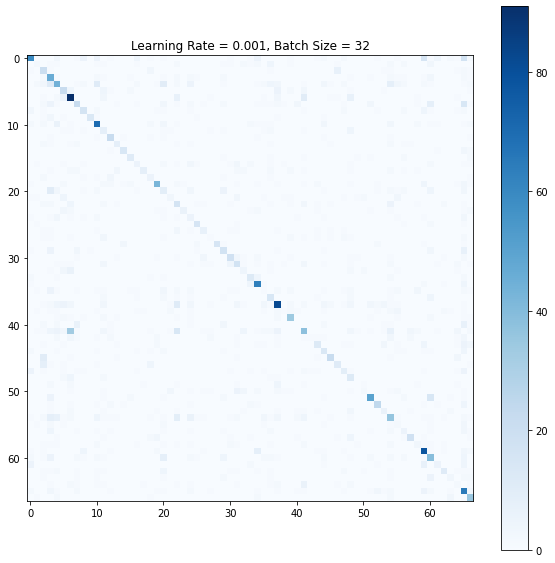

In [12]:
hist4,vgg4 = createVGGModel(lr[0],batch_size[1])
plotResult(hist4,lr[0],batch_size[1])
plotConfusionMatrix(vgg4,lr[0],batch_size[1])

Epoch 1/20
312/312 [==============================] - 25s 75ms/step - loss: 5.8529 - accuracy: 0.2100 - val_loss: 3.2115 - val_accuracy: 0.2902
Epoch 2/20
312/312 [==============================] - 24s 77ms/step - loss: 1.3168 - accuracy: 0.6573 - val_loss: 3.2799 - val_accuracy: 0.3547
Epoch 3/20
312/312 [==============================] - 24s 77ms/step - loss: 0.2915 - accuracy: 0.9295 - val_loss: 3.4091 - val_accuracy: 0.3643
Epoch 4/20
312/312 [==============================] - 24s 76ms/step - loss: 0.0538 - accuracy: 0.9949 - val_loss: 3.5321 - val_accuracy: 0.3968
Epoch 5/20
312/312 [==============================] - 27s 86ms/step - loss: 0.0273 - accuracy: 0.9981 - val_loss: 3.6230 - val_accuracy: 0.4040
Epoch 6/20
312/312 [==============================] - 26s 82ms/step - loss: 0.0347 - accuracy: 0.9978 - val_loss: 3.6055 - val_accuracy: 0.4088
Epoch 7/20
312/312 [==============================] - 25s 80ms/step - loss: 0.0389 - accuracy: 0.9974 - val_loss: 3.6472 - val_accuracy:

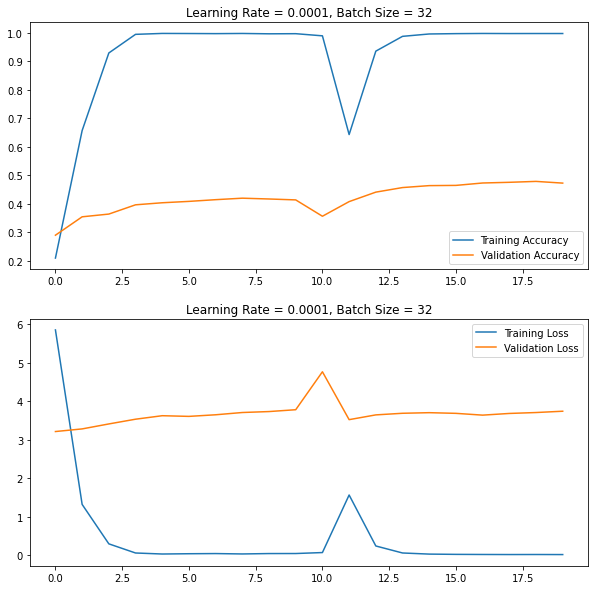

98/98 [==============================] - 6s 54ms/step


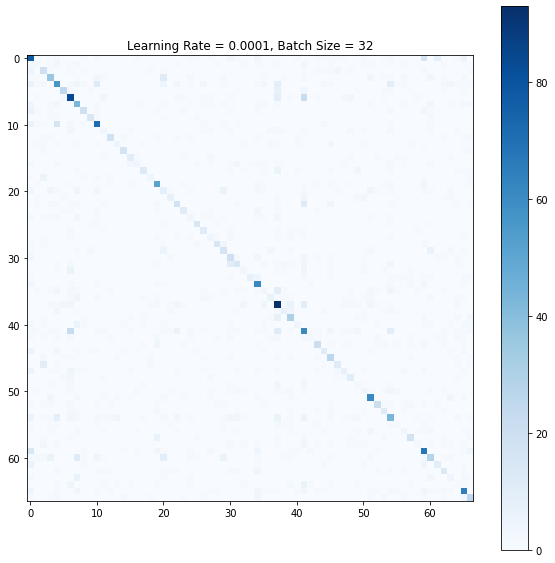

In [13]:
hist5,vgg5 = createVGGModel(lr[1],batch_size[1])
plotResult(hist5,lr[1],batch_size[1])
plotConfusionMatrix(vgg5,lr[1],batch_size[1])

Epoch 1/20
312/312 [==============================] - 27s 84ms/step - loss: 15.2846 - accuracy: 0.1000 - val_loss: 9.9272 - val_accuracy: 0.1735
Epoch 2/20
312/312 [==============================] - 24s 77ms/step - loss: 6.0085 - accuracy: 0.3078 - val_loss: 7.6164 - val_accuracy: 0.2160
Epoch 3/20
312/312 [==============================] - 25s 81ms/step - loss: 3.0188 - accuracy: 0.5218 - val_loss: 7.0019 - val_accuracy: 0.2445
Epoch 4/20
312/312 [==============================] - 24s 76ms/step - loss: 1.4995 - accuracy: 0.7159 - val_loss: 6.7185 - val_accuracy: 0.2521
Epoch 5/20
312/312 [==============================] - 26s 82ms/step - loss: 0.7010 - accuracy: 0.8594 - val_loss: 6.6003 - val_accuracy: 0.2653
Epoch 6/20
312/312 [==============================] - 22s 69ms/step - loss: 0.3144 - accuracy: 0.9421 - val_loss: 6.5324 - val_accuracy: 0.2653
Epoch 7/20
312/312 [==============================] - 23s 73ms/step - loss: 0.1491 - accuracy: 0.9770 - val_loss: 6.5047 - val_accuracy

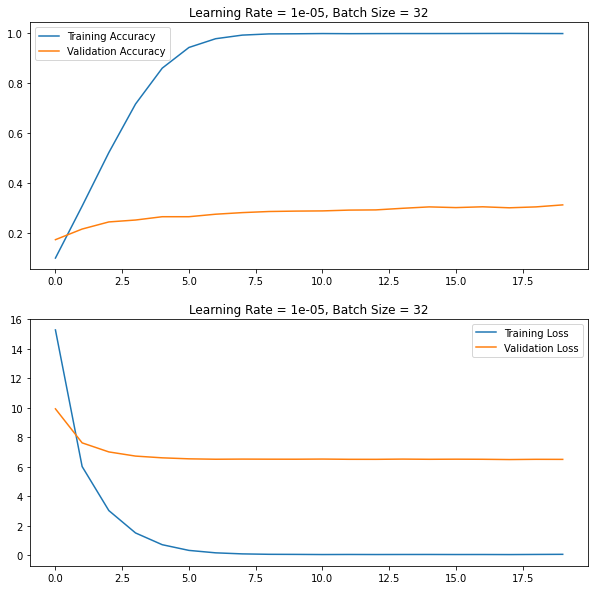

98/98 [==============================] - 6s 56ms/step


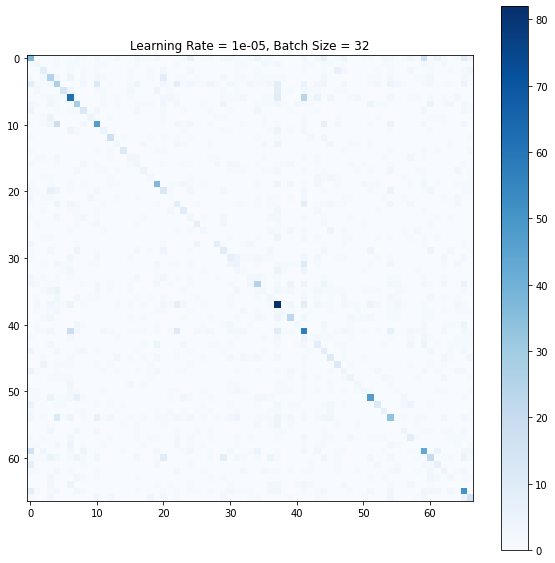

In [14]:
hist6,vgg6 = createVGGModel(lr[2],batch_size[1])
plotResult(hist6,lr[2],batch_size[1])
plotConfusionMatrix(vgg6,lr[2],batch_size[1])

In [9]:
vgg16_model = VGG16(weights='imagenet', include_top=False,classes = 67, input_shape=(128,128,3))


print(vgg16_model.summary())


# Freeze all the layers 
for layer in vgg16_model.layers[:-3]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg16_model.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Epoch 1/20
624/624 [==============================] - 34s 52ms/step - loss: 4.1689 - accuracy: 0.0418 - val_loss: 3.9902 - val_accuracy: 0.0497
Epoch 2/20
624/624 [==============================] - 33s 53ms/step - loss: 4.0029 - accuracy: 0.0447 - val_loss: 3.9942 - val_accuracy: 0.0497
Epoch 3/20
624/624 [==============================] - 35s 56ms/step - loss: 4.0007 - accuracy: 0.0446 - val_loss: 3.9928 - val_accuracy: 0.0445
Epoch 4/20
624/624 [==============================] - 34s 55ms/step - loss: 4.0007 - accuracy: 0.0425 - val_loss: 3.9890 - val_accuracy: 0.0497
Epoch 5/20
624/624 [==============================] - 34s 55ms/step - loss: 3.9991 - accuracy: 0.0455 - val_loss: 3.9850 - val_accuracy: 0.0497
Epoch 6/20
624/624 [==============================] - 36s 58ms/step - loss: 3.9990 - accuracy: 0.0440 - val_loss: 3.9898 - val_accuracy: 0.0445
Epoch 7/20
624/624 [==============================] - 35s 57ms/step - loss: 3.9981 - accuracy: 0.0450 - val_loss: 3.9904 - val_accuracy:

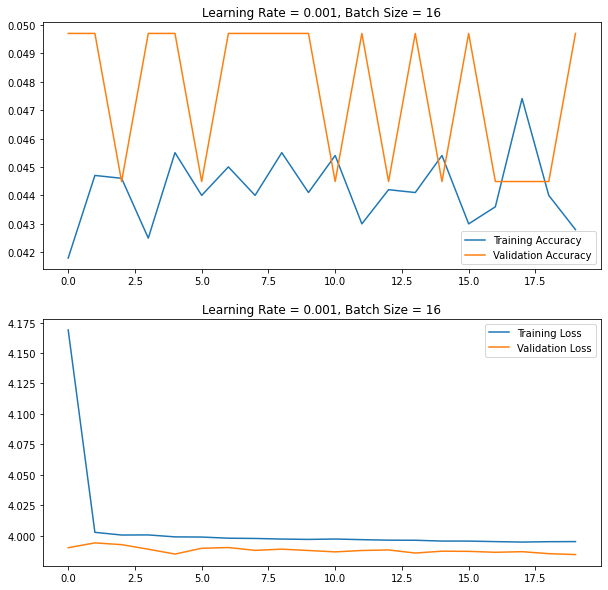

98/98 [==============================] - 5s 53ms/step


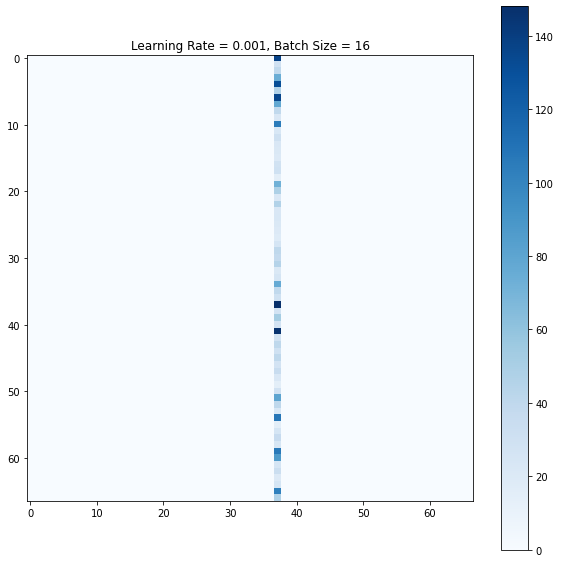

In [16]:
histc_1,vggc_1 = createVGGModel(lr[0],batch_size[0])
plotResult(histc_1,lr[0],batch_size[0])
plotConfusionMatrix(vggc_1,lr[0],batch_size[0])

Epoch 1/20
624/624 [==============================] - 32s 50ms/step - loss: 4.1987 - accuracy: 0.0434 - val_loss: 4.1925 - val_accuracy: 0.0497
Epoch 2/20
624/624 [==============================] - 31s 50ms/step - loss: 4.1870 - accuracy: 0.0463 - val_loss: 4.1810 - val_accuracy: 0.0497
Epoch 3/20
624/624 [==============================] - 31s 50ms/step - loss: 4.1760 - accuracy: 0.0463 - val_loss: 4.1701 - val_accuracy: 0.0497
Epoch 4/20
624/624 [==============================] - 32s 51ms/step - loss: 4.1654 - accuracy: 0.0463 - val_loss: 4.1597 - val_accuracy: 0.0497
Epoch 5/20
624/624 [==============================] - 31s 50ms/step - loss: 4.1555 - accuracy: 0.0463 - val_loss: 4.1498 - val_accuracy: 0.0497
Epoch 6/20
624/624 [==============================] - 31s 50ms/step - loss: 4.1460 - accuracy: 0.0463 - val_loss: 4.1404 - val_accuracy: 0.0497
Epoch 7/20
624/624 [==============================] - 31s 50ms/step - loss: 4.1370 - accuracy: 0.0463 - val_loss: 4.1316 - val_accuracy:

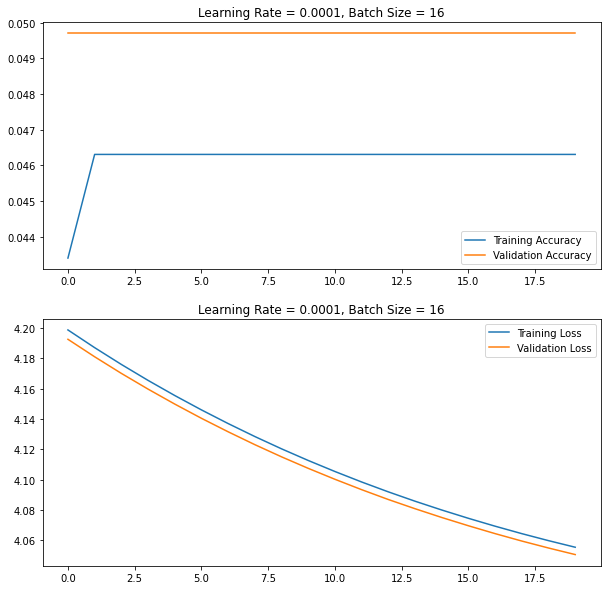

98/98 [==============================] - 4s 44ms/step


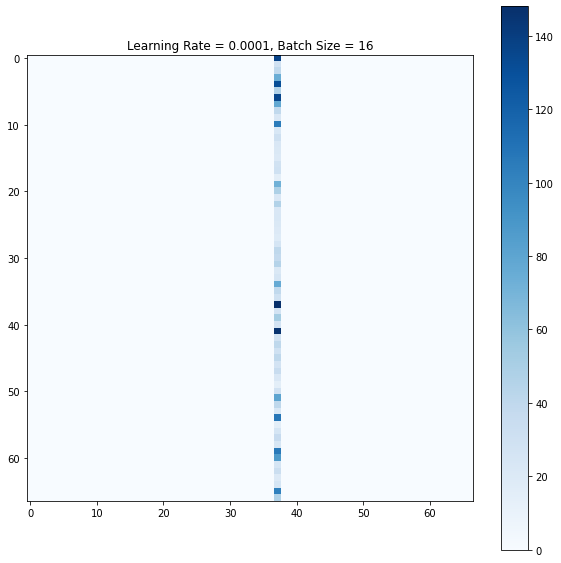

In [17]:
histc_2,vggc_2 = createVGGModel(lr[1],batch_size[0])
plotResult(histc_2,lr[1],batch_size[0])
plotConfusionMatrix(vggc_2,lr[1],batch_size[0])

Epoch 1/20
624/624 [==============================] - 43s 56ms/step - loss: 6.7886 - accuracy: 0.0552 - val_loss: 4.1076 - val_accuracy: 0.0762
Epoch 2/20
624/624 [==============================] - 30s 48ms/step - loss: 3.6156 - accuracy: 0.1682 - val_loss: 3.7642 - val_accuracy: 0.1583
Epoch 3/20
624/624 [==============================] - 30s 49ms/step - loss: 2.8053 - accuracy: 0.3281 - val_loss: 3.4637 - val_accuracy: 0.2269
Epoch 4/20
624/624 [==============================] - 30s 48ms/step - loss: 1.9615 - accuracy: 0.5160 - val_loss: 3.3053 - val_accuracy: 0.2689
Epoch 5/20
624/624 [==============================] - 30s 48ms/step - loss: 1.2167 - accuracy: 0.7101 - val_loss: 3.2547 - val_accuracy: 0.2906
Epoch 6/20
624/624 [==============================] - 30s 48ms/step - loss: 0.6533 - accuracy: 0.8656 - val_loss: 3.3346 - val_accuracy: 0.3062
Epoch 7/20
624/624 [==============================] - 30s 48ms/step - loss: 0.3035 - accuracy: 0.9499 - val_loss: 3.4364 - val_accuracy:

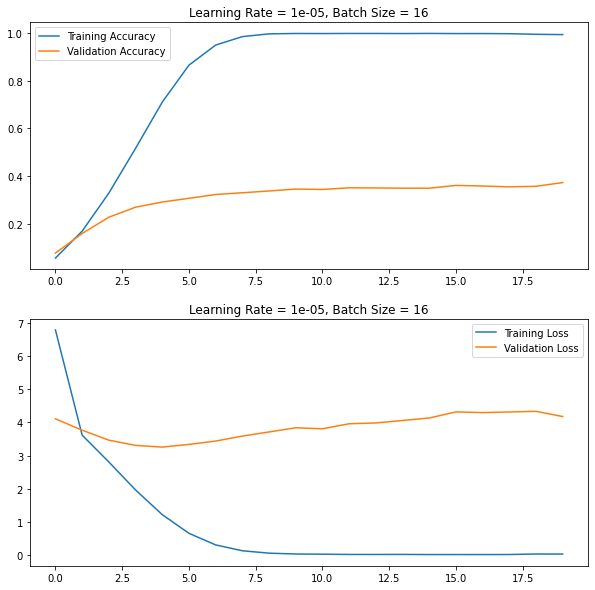

98/98 [==============================] - 11s 71ms/step


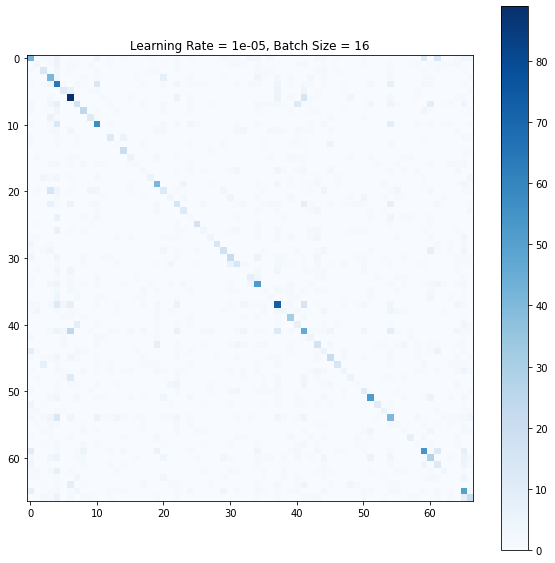

In [12]:
histc_3,vggc_3 = createVGGModel(lr[2],batch_size[0])
plotResult(histc_3,lr[2],batch_size[0])
plotConfusionMatrix(vggc_3,lr[2],batch_size[0])

Epoch 1/20
312/312 [==============================] - 25s 77ms/step - loss: 4.0572 - accuracy: 0.0451 - val_loss: 4.0155 - val_accuracy: 0.0369
Epoch 2/20
312/312 [==============================] - 24s 76ms/step - loss: 3.9914 - accuracy: 0.0466 - val_loss: 4.0119 - val_accuracy: 0.0369
Epoch 3/20
312/312 [==============================] - 23s 75ms/step - loss: 3.9893 - accuracy: 0.0447 - val_loss: 4.0142 - val_accuracy: 0.0369
Epoch 4/20
312/312 [==============================] - 24s 75ms/step - loss: 3.9878 - accuracy: 0.0467 - val_loss: 4.0179 - val_accuracy: 0.0377
Epoch 5/20
312/312 [==============================] - 23s 75ms/step - loss: 3.9879 - accuracy: 0.0474 - val_loss: 4.0154 - val_accuracy: 0.0369
Epoch 6/20
312/312 [==============================] - 23s 75ms/step - loss: 3.9871 - accuracy: 0.0501 - val_loss: 4.0129 - val_accuracy: 0.0369
Epoch 7/20
312/312 [==============================] - 23s 75ms/step - loss: 3.9881 - accuracy: 0.0472 - val_loss: 4.0118 - val_accuracy:

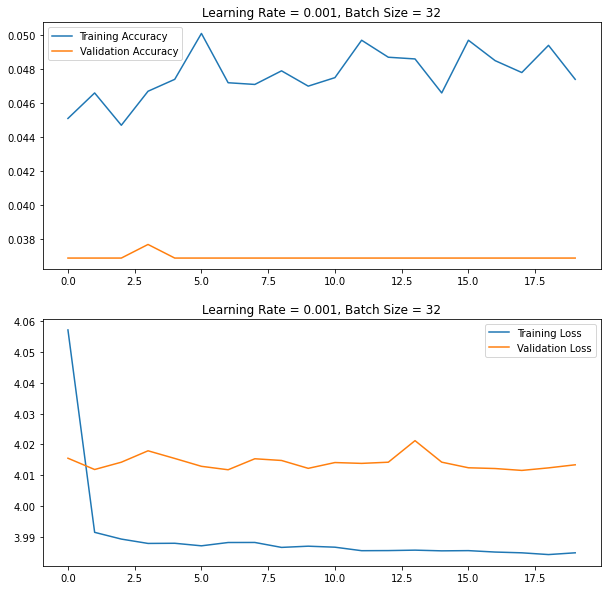

98/98 [==============================] - 5s 48ms/step


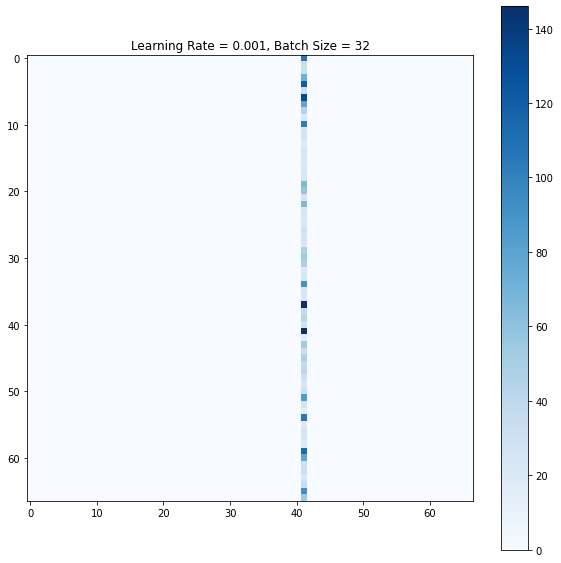

In [14]:
histc_4,vggc_4 = createVGGModel(lr[0],batch_size[1])
plotResult(histc_4,lr[0],batch_size[1])
plotConfusionMatrix(vggc_4,lr[0],batch_size[1])

In [ ]:
histc_5,vggc_5 = createVGGModel(lr[1],batch_size[1])
plotResult(histc_5,lr[1],batch_size[1])
plotConfusionMatrix(vggc_5,lr[1],batch_size[1])

Epoch 1/20
312/312 [==============================] - 33s 104ms/step - loss: 4.2007 - accuracy: 0.0424 - val_loss: 4.1967 - val_accuracy: 0.0429
Epoch 2/20
312/312 [==============================] - 34s 110ms/step - loss: 4.1929 - accuracy: 0.0466 - val_loss: 4.1890 - val_accuracy: 0.0429
Epoch 3/20
312/312 [==============================] - 35s 112ms/step - loss: 4.1854 - accuracy: 0.0466 - val_loss: 4.1816 - val_accuracy: 0.0429
Epoch 4/20
312/312 [==============================] - 35s 112ms/step - loss: 4.1781 - accuracy: 0.0466 - val_loss: 4.1744 - val_accuracy: 0.0429
Epoch 5/20
312/312 [==============================] - 33s 106ms/step - loss: 4.1711 - accuracy: 0.0466 - val_loss: 4.1674 - val_accuracy: 0.0429
Epoch 6/20
312/312 [==============================] - 33s 107ms/step - loss: 4.1643 - accuracy: 0.0466 - val_loss: 4.1607 - val_accuracy: 0.0429
Epoch 7/20
312/312 [==============================] - 33s 107ms/step - loss: 4.1577 - accuracy: 0.0466 - val_loss: 4.1542 - val_ac

Epoch 1/20
312/312 [==============================] - 33s 104ms/step - loss: 4.2043 - accuracy: 0.0414 - val_loss: 4.2039 - val_accuracy: 0.0369
Epoch 2/20
312/312 [==============================] - 32s 104ms/step - loss: 4.2035 - accuracy: 0.0487 - val_loss: 4.2032 - val_accuracy: 0.0369
Epoch 3/20
312/312 [==============================] - 32s 104ms/step - loss: 4.2026 - accuracy: 0.0483 - val_loss: 4.2024 - val_accuracy: 0.0369
Epoch 4/20
312/312 [==============================] - 32s 103ms/step - loss: 4.2018 - accuracy: 0.0497 - val_loss: 4.2016 - val_accuracy: 0.0369
Epoch 5/20
312/312 [==============================] - 32s 104ms/step - loss: 4.2010 - accuracy: 0.0483 - val_loss: 4.2009 - val_accuracy: 0.0369
Epoch 6/20
312/312 [==============================] - 32s 103ms/step - loss: 4.2002 - accuracy: 0.0497 - val_loss: 4.2001 - val_accuracy: 0.0369
Epoch 7/20
312/312 [==============================] - 32s 104ms/step - loss: 4.1994 - accuracy: 0.0497 - val_loss: 4.1993 - val_ac

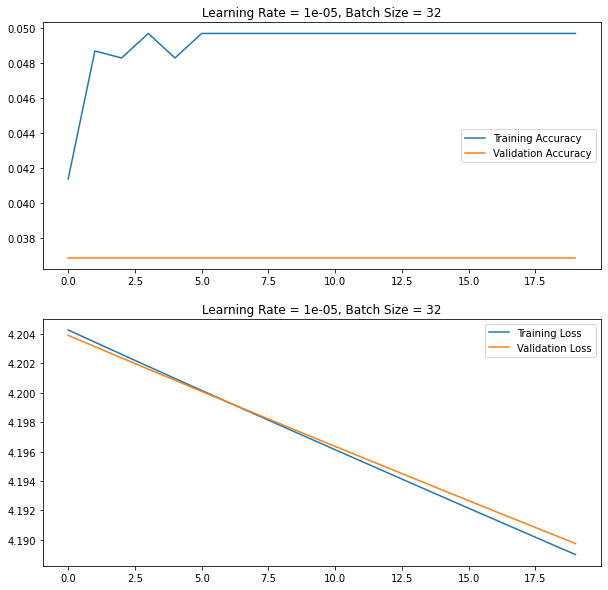

98/98 [==============================] - 8s 85ms/step


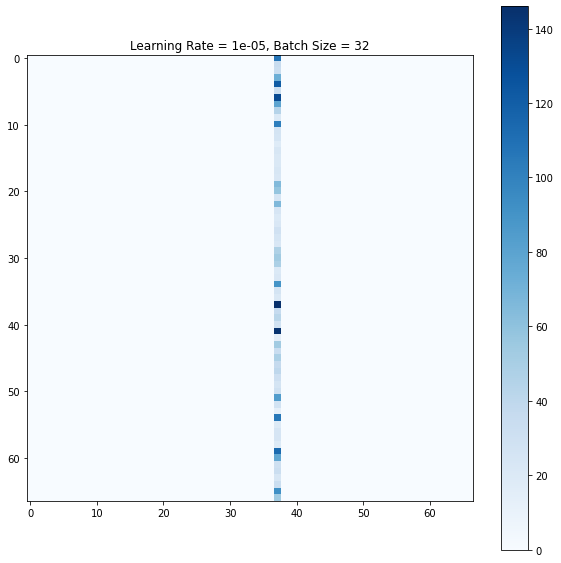

In [15]:
histc_6,vggc_6 = createVGGModel(lr[2],batch_size[1])
plotResult(histc_6,lr[2],batch_size[1])
plotConfusionMatrix(vggc_6,lr[2],batch_size[1])